# **NEURAL NETWORK FOR PHISHING URL ANALYSIS**

---

### **Model Architecture**
The model architecture consists of a combination of a 1D Convolutional Neural Network (CNN) and a Long Short-Term Memory (LSTM) layer.  
The CNN layer acts as a filter, searching for important patterns in the input data. It focuses on small sections at a time and captures specific details within the data.  
The LSTM layer functions like a memory, retaining important recurring patterns in the data sequence.

<style>
.title {
    font-size: 30px;
    color: white;
}
</style>

<div class="title">

---
.

The model's accuracy is approximately **90.46%**.

</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/phishing-detection-rnn-cnn/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/phishing-detection-rnn-cnn


## Install required libraries

In [3]:
!pip install tensorflow pandas numpy matplotlib sklearn seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Importing all required libraries
Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and
TensorFlow's Keras module, enabling data manipulation, visualization etc..

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data loading and preprocessing

In [5]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/phishing-detection-rnn-cnn/dataset_phishing.csv')

data['status'] = data['status'].replace('legitimate', 0)
data['status'] = data['status'].replace('phishing', 1)

/tmp/ipython-input-3411381361.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['status'] = data['status'].replace('phishing', 1)


# Data visualization
## Pie chart to check for any class imbalance

<Axes: ylabel='count'>

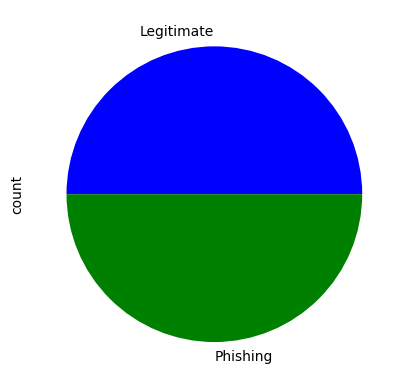

In [6]:
data['status'].value_counts().plot(kind = 'pie', colors = ['blue', 'green'], labels=['Legitimate', 'Phishing'])

In [7]:
data['status']

,status
0,0
1,1
2,1
3,0
4,0
...,...
11425,0
11426,1
11427,0
11428,0


## Train-test data split


In [8]:
X = data.drop(['url', 'status'], axis = 1)
Y = data['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)

## Correlation matrix

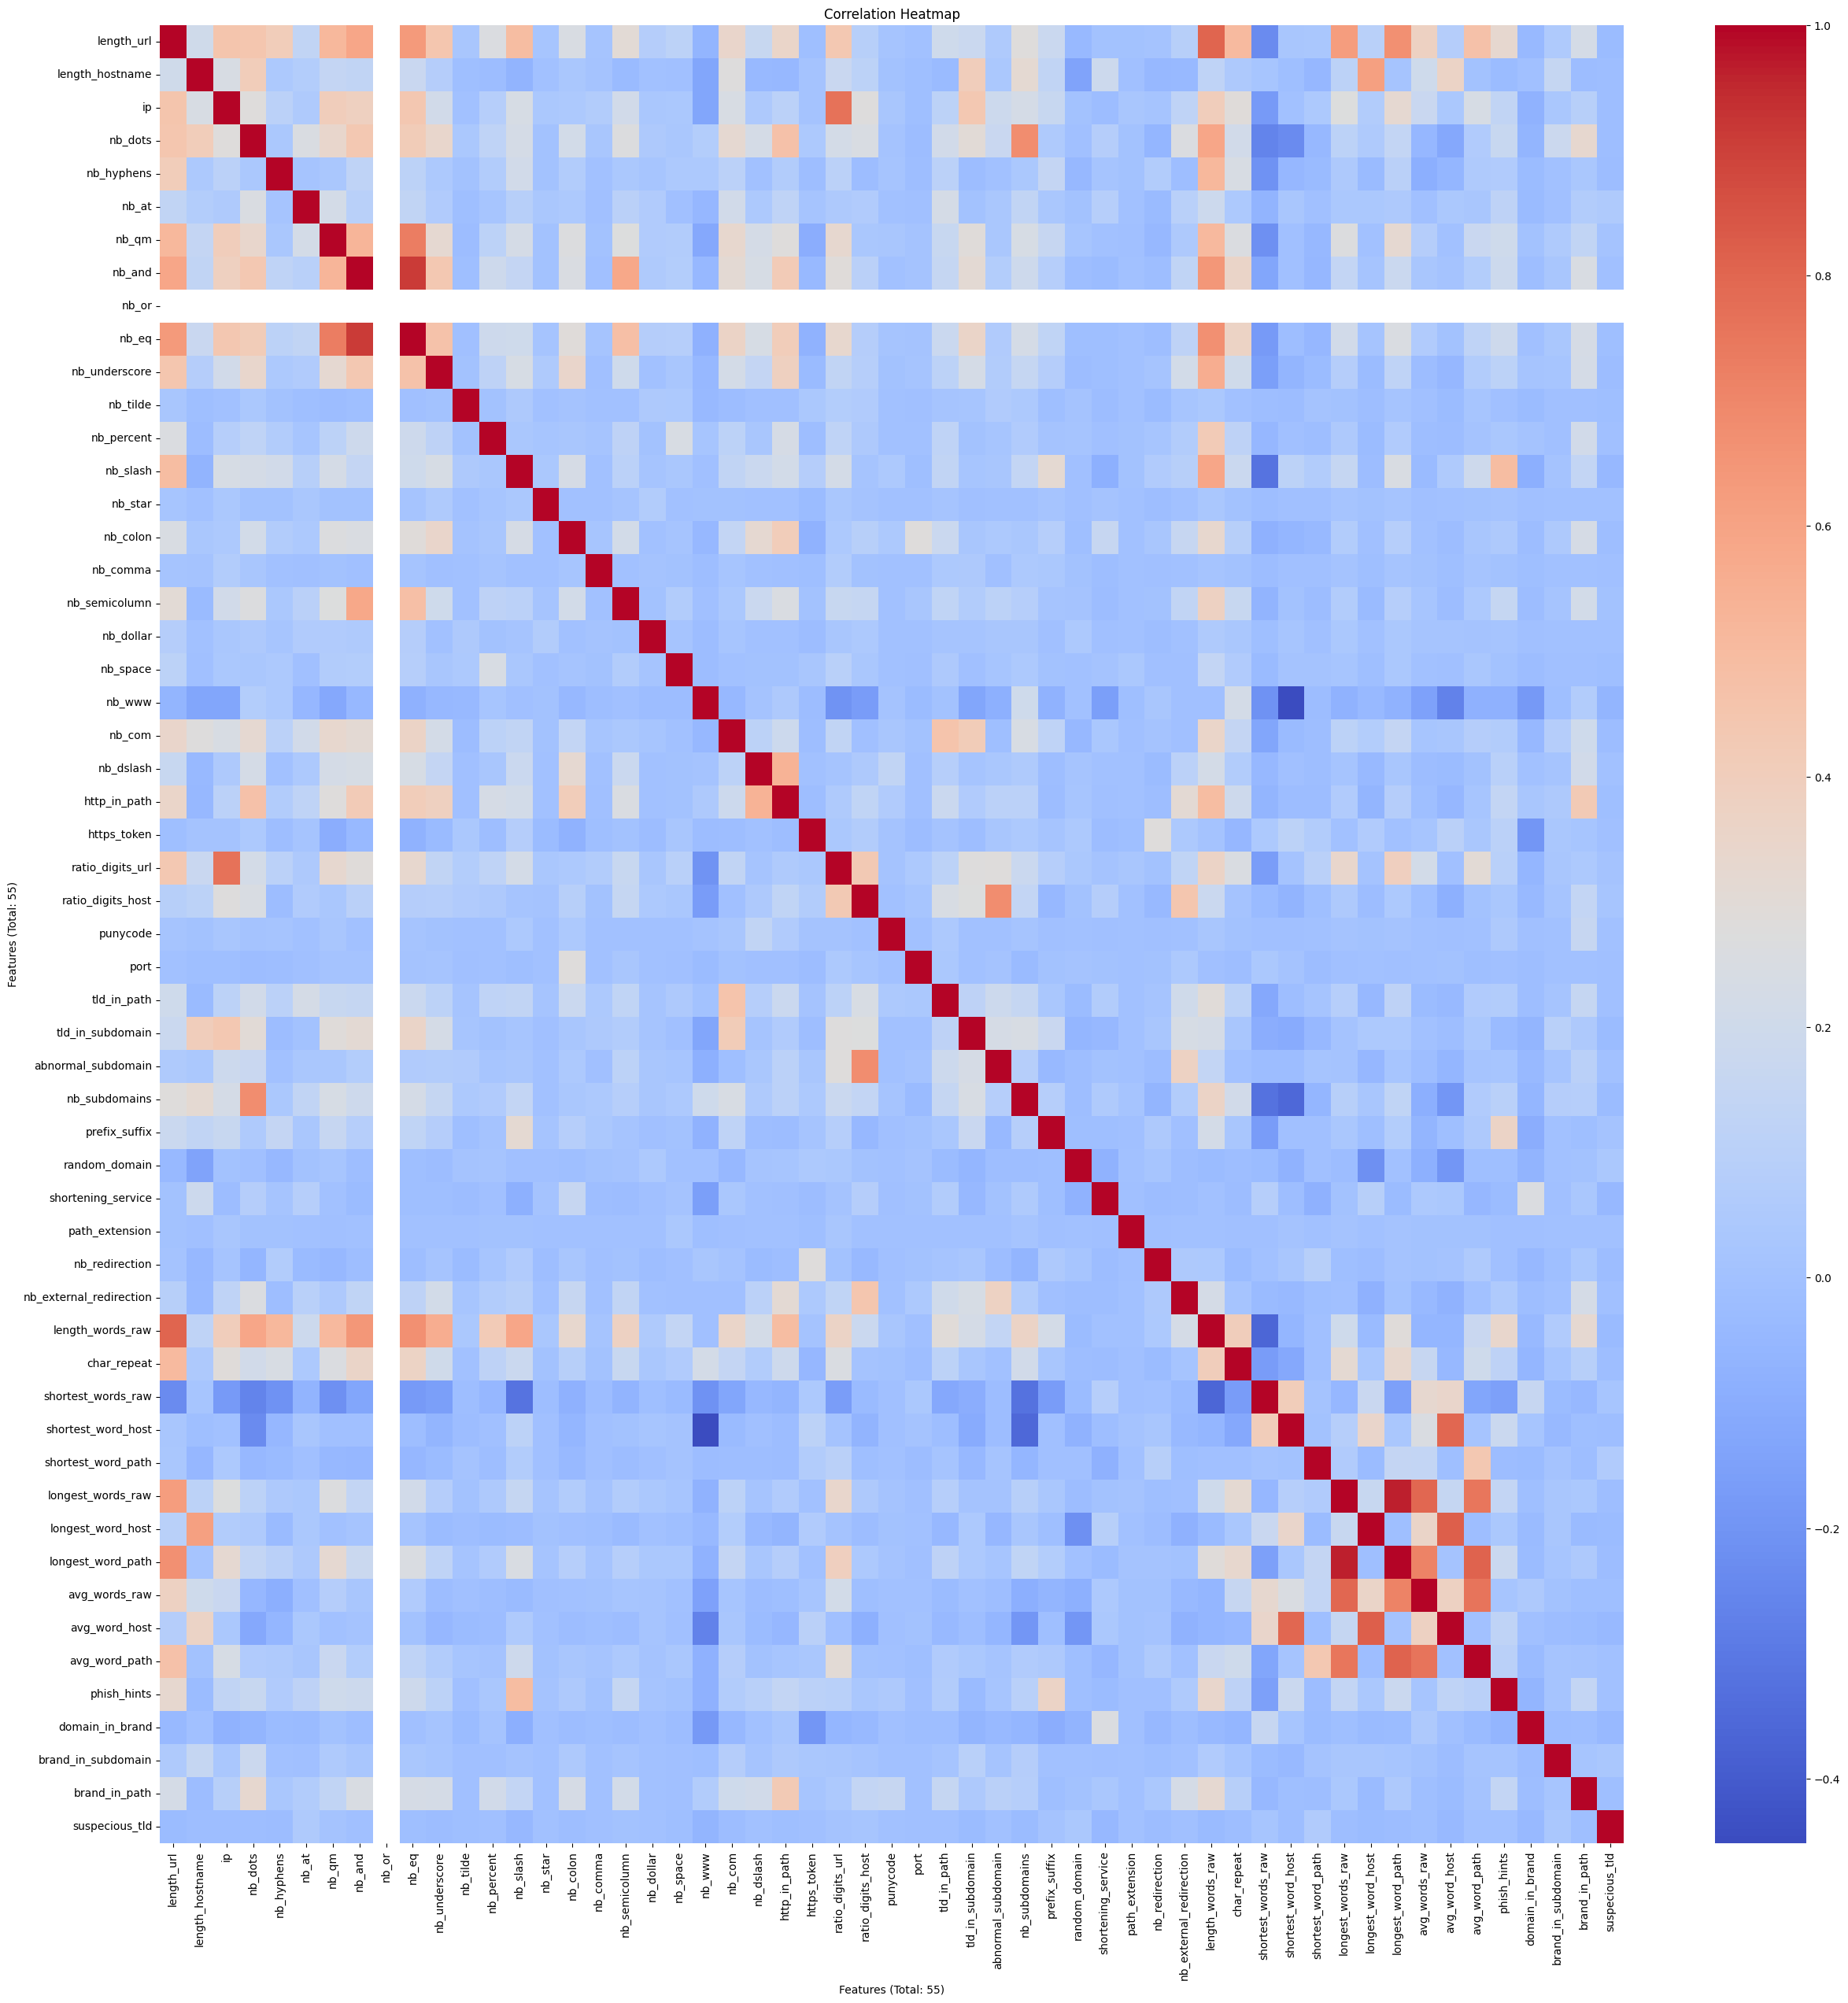

In [9]:
mat = X_train.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(mat, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xlabel(f'Features (Total: {mat.shape[1]})')
plt.ylabel(f'Features (Total: {mat.shape[1]})')
plt.show()

## Plotting important features


In [10]:
imp_features = [
    ['length_url', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_dslash', 'nb_redirection'],
    ['nb_semicolumn', 'nb_www', 'nb_dollar', 'domain_in_title', 'https_token', 'ratio_digits_url', 'iframe'],
    ['nb_comma', 'http_in_path', 'domain_with_copyright', 'domain_age', 'domain_registration_length', 'phish_hints', 'brand_in_path'],
    ['shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path'],
    ['avg_words_raw', 'avg_word_host', 'avg_word_path', 'domain_in_brand', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks']
]

## Model architecture
The model architecture combines a one-dimensional Convolutional Neural Network (1D CNN) with a Long Short-Term Memory (LSTM) layer.  
The primary reason for including the LSTM layer is to identify relevant recurring patterns in the data.  
The model is built using the Keras library with a sequential structure.



In [11]:
# Build the model
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, input_shape=(87,1), kernel_size=2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),

    keras.layers.LSTM(100),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dense(2, activation='sigmoid'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Loss function and model metrics definition
The loss function used here is sparse categorical cross-entropy, which returns one-hot encodings.

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model training
The model is trained for 100 epochs using the default batch size.

In [13]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5405 - loss: 0.6909
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6634 - loss: 0.6029
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7708 - loss: 0.4746
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8069 - loss: 0.4108
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8448 - loss: 0.3526
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8566 - loss: 0.3333
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8622 - loss: 0.3146
Epoch 8/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8637 - loss: 0.3210
Epoch 9/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8634 - loss: 0.3144
Epoch 10/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8778 - loss: 0.2842
Epoch 11/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8812 - loss: 0.2856
Epoch 12/100
251/251 ━━━━━━━━━━━━━━━━━━━

## Plotting accuracy vs. epochs graph

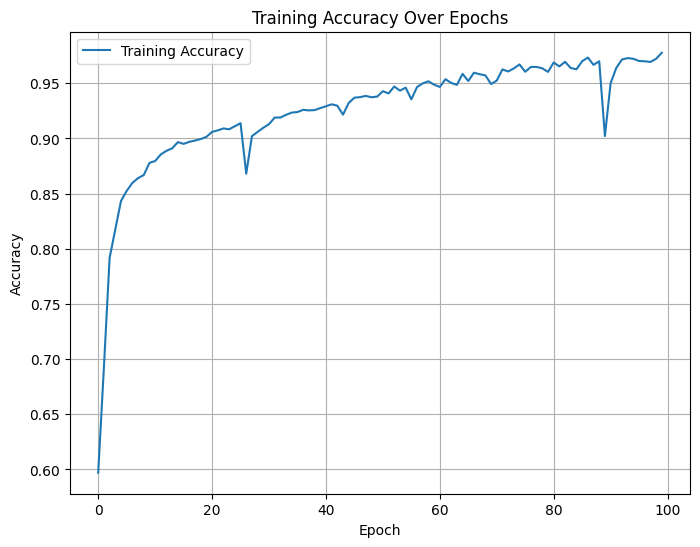

In [14]:
np.save("history.npy", history)
accuracy = history.history['accuracy']

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Model summary


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 86, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,696 (1.59 MB)

 Trainable params: 138,898 (542.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 277,798 (1.06 MB)

## Saving the model
Saving the model helps avoid retraining and allows it to be reused multiple times.

In [16]:
model.save('/content/drive/MyDrive/phishing-detection-rnn-cnn/my_model.keras')

## Misclassification count
The number of incorrect classifications made by the model on the training data.

In [17]:
Y_pred = model.predict(X_train)
cnt = 0
for i in range(len(Y_pred)):
    if(np.argmax(Y_pred[i]) != np.array(Y_train)[i]):
      cnt = cnt + 1
print(cnt)

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
140


## Testing the model
model.evaluate() is a built-in function that helps evaluate the model's test accuracy.

In [18]:
from keras import models
model = models.load_model('/content/drive/MyDrive/phishing-detection-rnn-cnn/my_model.keras')
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_accuracy)

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8884 - loss: 0.4035
0.8897637724876404


## Generating classification reports


In [19]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

report = classification_report(Y_test, Y_pred_classes)
print(report)

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1732
           1       0.91      0.86      0.89      1697

    accuracy                           0.89      3429
   macro avg       0.89      0.89      0.89      3429
weighted avg       0.89      0.89      0.89      3429



## Confusion matrix

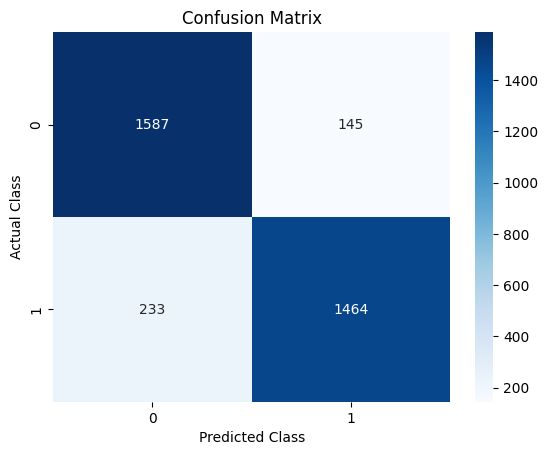

In [20]:
cm = confusion_matrix(Y_test, Y_pred_classes)
fig, ax = plt.subplots()

sns.heatmap(cm, fmt = 'd', annot=True, cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
ax.set_title('Confusion Matrix')


plt.show()

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from keras import models
model = models.load_model('/content/drive/MyDrive/phishing-detection-rnn-cnn/my_model.keras')

## Receiver Operating Characteristic (ROC) curve

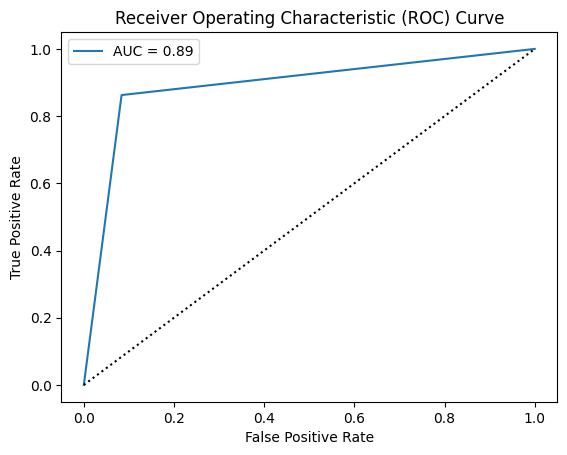

In [22]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_classes)
auc = roc_auc_score(Y_test, Y_pred_classes)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k:')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Custom URL evaluation

In [ ]:
import numpy as np
import re
from urllib.parse import urlparse
import itertools
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("my_model.keras")

def extract_features(url):
    features = {}

    # Basic URL features
    features['length_url'] = len(url)

    # Parse the URL
    parsed = urlparse(url)
    hostname = parsed.netloc
    path = parsed.path

    # Hostname features
    features['length_hostname'] = len(hostname)

    # Check if it contains an IP address
    ip_pattern = r'^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'
    features['ip'] = 1 if re.match(ip_pattern, hostname.split(':')[0]) else 0

    # Count special characters
    features['nb_dots'] = url.count('.')
    features['nb_hyphens'] = url.count('-')
    features['nb_at'] = url.count('@')
    features['nb_qm'] = url.count('?')
    features['nb_and'] = url.count('&')
    features['nb_or'] = url.count('|')
    features['nb_eq'] = url.count('=')
    features['nb_underscore'] = url.count('_')
    features['nb_tilde'] = url.count('~')
    features['nb_percent'] = url.count('%')
    features['nb_slash'] = url.count('/')
    features['nb_star'] = url.count('*')
    features['nb_colon'] = url.count(':')
    features['nb_comma'] = url.count(',')
    features['nb_semicolon'] = url.count(';')
    features['nb_dollar'] = url.count('$')
    features['nb_space'] = url.count(' ')
    features['nb_www'] = 1 if 'www' in hostname.lower() else 0
    features['nb_com'] = 1 if 'com' in hostname.lower() else 0
    features['nb_dslash'] = url.count('//')
    features['http_in_path'] = 1 if 'http' in path.lower() else 0
    features['https_token'] = 1 if url.startswith('https://') else 0

    # Calculate digit ratio
    digits_count = sum(c.isdigit() for c in url)
    features['ratio_digits_url'] = digits_count / len(url) if len(url) > 0 else 0

    digits_count_host = sum(c.isdigit() for c in hostname)
    features['ratio_digits_host'] = digits_count_host / len(hostname) if len(hostname) > 0 else 0

    # Other features
    features['punycode'] = 1 if 'xn--' in hostname.lower() else 0
    features['port'] = 1 if ':' in hostname and any(c.isdigit() for c in hostname.split(':')[1]) else 0

    tlds = ['.com', '.org', '.net', '.edu', '.gov', '.mil', '.int', '.biz', '.info', '.mobi', '.name', '.ly']
    features['tld_in_path'] = 1 if any(tld in path.lower() for tld in tlds) else 0
    features['tld_in_subdomain'] = 1 if hostname.count('.') > 1 and any(tld in hostname.lower().split('.')[0] for tld in tlds) else 0
    features['abnormal_subdomain'] = 1 if hostname.count('.') > 2 else 0
    features['nb_subdomains'] = hostname.count('.')
    features['prefix_suffix'] = 1 if '-' in hostname else 0
    features['random_domain'] = 0

    # URL shortening services
    shortening_services = ['bit.ly', 'goo.gl', 't.co', 'tinyurl.com', 'is.gd',
                          'cli.gs', 'on.ly', 'short.cm', 'tiny.cc', 'shorte.st',
                          'goo.gl', 'x.co', 'prettylinkpro.com', 'viralurl.com',
                          'qr.net', 'lurl.no', 'tweez.me', 'v.gd', 'tr.im', 'link.zip.net']
    features['shortening_service'] = 1 if any(service in hostname.lower() for service in shortening_services) else 0

    # Path extensions
    path_extensions = ['.php', '.html', '.htm', '.asp', '.aspx', '.jsp', '.js', '.css', '.py']
    features['path_extension'] = 1 if any(ext in path.lower() for ext in path_extensions) else 0
    features['nb_redirection'] = url.count('http') - 1 if url.count('http') > 1 else 0
    features['nb_external_redirection'] = 0

    # Word analysis
    raw_words = re.findall(r'[a-zA-Z0-9]+', url)
    host_words = re.findall(r'[a-zA-Z0-9]+', hostname)
    path_words = re.findall(r'[a-zA-Z0-9]+', path) if path else []

    features['length_words_raw'] = len(raw_words)
    features['char_repeat'] = max([len(list(group)) for char, group in itertools.groupby(url)], default=0)
    features['shortest_word_raw'] = min([len(word) for word in raw_words], default=0) if raw_words else 0
    features['shortest_word_host'] = min([len(word) for word in host_words], default=0) if host_words else 0
    features['shortest_word_path'] = min([len(word) for word in path_words], default=0) if path_words else 0
    features['longest_word_raw'] = max([len(word) for word in raw_words], default=0) if raw_words else 0
    features['longest_word_host'] = max([len(word) for word in host_words], default=0) if host_words else 0
    features['longest_word_path'] = max([len(word) for word in path_words], default=0) if path_words else 0
    features['avg_word_raw'] = sum([len(word) for word in raw_words]) / len(raw_words) if raw_words else 0
    features['avg_word_host'] = sum([len(word) for word in host_words]) / len(host_words) if host_words else 0
    features['avg_word_path'] = sum([len(word) for word in path_words]) / len(path_words) if path_words else 0

    # Phishing features
    phishing_words = ['secure', 'account', 'verify', 'login', 'update', 'signin', 'banking', 'confirm']
    features['phish_hints'] = 1 if any(word in url.lower() for word in phishing_words) else 0
    features['domain_in_brand'] = 0
    features['brand_in_subdomain'] = 0
    features['brand_in_path'] = 0
    features['suspecious_tld'] = 1 if any(hostname.lower().endswith(tld) for tld in ['.tk', '.xyz', '.top', '.ml', '.ga', '.cf', '.gq']) else 0

    # ======================================================
    # REMOVED FEATURES (NOT INCLUDED IN THE DICTIONARY)
    # ======================================================

    # Ordered list of features (excluding the removed ones)
    ordered_features = [
        features['length_url'],
        features['length_hostname'],
        features['ip'],
        features['nb_dots'],
        features['nb_hyphens'],
        features['nb_at'],
        features['nb_qm'],
        features['nb_and'],
        features['nb_or'],
        features['nb_eq'],
        features['nb_underscore'],
        features['nb_tilde'],
        features['nb_percent'],
        features['nb_slash'],
        features['nb_star'],
        features['nb_colon'],
        features['nb_comma'],
        features['nb_semicolon'],
        features['nb_dollar'],
        features['nb_space'],
        features['nb_www'],
        features['nb_com'],
        features['nb_dslash'],
        features['http_in_path'],
        features['https_token'],
        features['ratio_digits_url'],
        features['ratio_digits_host'],
        features['punycode'],
        features['port'],
        features['tld_in_path'],
        features['tld_in_subdomain'],
        features['abnormal_subdomain'],
        features['nb_subdomains'],
        features['prefix_suffix'],
        features['random_domain'],
        features['shortening_service'],
        features['path_extension'],
        features['nb_redirection'],
        features['nb_external_redirection'],
        features['length_words_raw'],
        features['char_repeat'],
        features['shortest_word_raw'],
        features['shortest_word_host'],
        features['shortest_word_path'],
        features['longest_word_raw'],
        features['longest_word_host'],
        features['longest_word_path'],
        features['avg_word_raw'],
        features['avg_word_host'],
        features['avg_word_path'],
        features['phish_hints'],
        features['domain_in_brand'],
        features['brand_in_subdomain'],
        features['brand_in_path'],
        features['suspecious_tld']
    ]

    return np.array(ordered_features, dtype=np.float64)

def preprocess_url(url):
    features = extract_features(url)
    return features.reshape(1, -1)

def predict_url(url):
    X = preprocess_url(url)
    prediction = model.predict(X)
    predicted_class = np.argmax(prediction, axis=1)[0]
    probability = prediction[0][predicted_class]

    result = {
        'url': url,
        'is_phishing': bool(predicted_class),
        'prediction': 'phishing' if predicted_class else 'legitimate',
        'probability': float(probability)
    }

    # Warning for known sites
    known_sites = [
        'https://www.google.com',
        'https://www.facebook.com',
        'https://www.microsoft.com',
        'https://www.apple.com'
    ]

    if any(url.startswith(site) for site in known_sites):
        print("\nNOTE: The model may misclassify known legitimate sites.")
        print("This is due to limitations in the current implementation.")

    return result

# Function for interactive analysis
def analyze_user_url():
    url = input("\nEnter the URL you want to analyze: ")
    result = predict_url(url)

    print(f"\nURL: {result['url']}")
    print(f"Prediction: {result['prediction']}")
    print(f"Probability: {result['probability']:.4f}")

    if result['is_phishing']:
        print("\nWARNING: This URL has been classified as potentially malicious (phishing).")
        print("It is recommended not to access this website.")
    else:
        print("\nThis URL has been classified as legitimate.")

    print("\nNOTE: This model has limitations and may produce false positives or false negatives.")
    print("For greater accuracy, it is recommended to complement with other security tools.")

# Run interactive analysis
analyze_user_url()